# Fun√ß√µes de Probabilidade - Desafio 3

O objetivo dessa semana foi aprender mais sobre amostragram, fun√ß√µes de probabilidade, distribui√ß√£o normal e binomial, entre outros elementos que introduzem ao campo da Estat√≠stica.
Neste desafio, iremos praticar nossos conhecimentos sobre distribui√ß√µes de probabilidade. Para tal, o desafio √© dividido em duas partes:
    
1. A primeira parte contar√° com 3 quest√µes sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte ser√° sobre a an√°lise da distribui√ß√£o de uma vari√°vel do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 quest√µes.

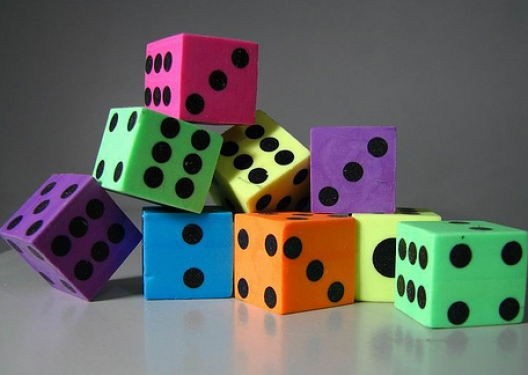

## _Setup_ geral

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

## Parte 1

### _Setup_ da parte 1

In [60]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua an√°lise a partir da parte 1 a partir daqui

#### Analisando o dataframe
O ```dataframe``` disp√µe de uma coluna de nome ```normal``` que possui valores normais em que a m√©dia √© 20, o desvio padr√£o √© 4 (e, portanto, a vari√¢ncia √© 16). Enquanto isso, a coluna ```binomial``` consiste numa coluna de valores binomais com a mesma m√©dia, desvio padr√£o e vari√¢ncia. Vamos conferir √† baixo:

In [61]:
print('Normal -','Media:', dataframe.normal.mean(),
      'Desvio Padr√£o: ', dataframe.normal.std(),
      'Vari√¢ncia:', dataframe.normal.var())
print('Binomial -','Media:', dataframe.binomial.mean(),
      'Desvio Padr√£o: ', dataframe.binomial.std(),
      'Vari√¢ncia:', dataframe.binomial.var())

Normal - Media: 19.991456066526293 Desvio Padr√£o:  4.013849522013614 Vari√¢ncia: 16.110987985368915
Binomial - Media: 20.097 Desvio Padr√£o:  4.0411909287253724 Vari√¢ncia: 16.331224122412237


In [62]:
# Outra formas de encontrar esses dados √© pelo m√©todo describe (com exce√ß√£o da vari√¢ncia)
dataframe.describe()

normal      binomial
count  10000.000000  10000.000000
mean      19.991456     20.097000
std        4.013850      4.041191
min        4.310399      6.000000
25%       17.309638     17.000000
50%       19.989620     20.000000
75%       22.684324     23.000000
max       35.704951     36.000000

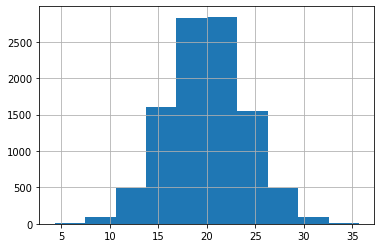

In [63]:
# Histograma da Coluna Normal
dataframe.normal.hist()

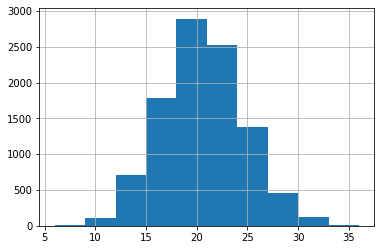

In [64]:
# Histograma da Coluna Binomial
dataframe.binomial.hist()

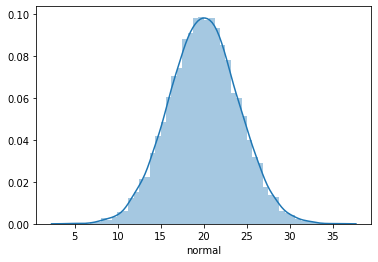

In [65]:
sns.distplot(dataframe.normal);

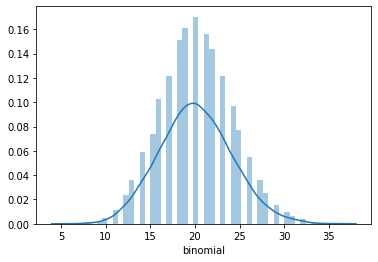

In [66]:
sns.distplot(dataframe.binomial);

In [67]:
dataframe.dtypes

normal      float64
binomial      int32
dtype: object

In [69]:
# quest√£o 1 
q1_norm, q2_norm, q3_norm = dataframe.normal.quantile([0.25, 0.5, 0.75])
q1_binom, q2_binom, q3_binom = dataframe.binomial.quantile([0.25, 0.5, 0.75])
(round(float(q1_norm - q1_binom),3), round(float(q2_norm - q2_binom),3), round(float(q3_norm - q3_binom),3))

In [96]:
# quest√£o 2
x = dataframe['normal'].mean()
s = dataframe['normal'].std()
e_cdf = ECDF(dataframe['normal'])
intervalo_min = x - s
intervalo_max = x + s
result = e_cdf(intervalo_max) - e_cdf(intervalo_min)
np.asscalar(result.round(3))

0.684

LINK √öTIL:
[How to Use an Empirical Distribution Function in Python](https://machinelearningmastery.com/empirical-distribution-function-in-python/)

In [ ]:
# quest√£o 3
m_binom, v_binom = dataframe.binomial.mean(), dataframe.binomial.var()
m_norm, v_norm = dataframe.normal.mean(), dataframe.normal.var()
round((m_binom - m_norm),3), round((v_binom - v_norm),3)

## Quest√£o 1

Qual a diferen√ßa entre os quartis (Q1, Q2 e Q3) das vari√°veis `normal` e `binomial` de `dataframe`? Responda como uma tupla de tr√™s elementos arredondados para tr√™s casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da vari√°vel `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da vari√°vel `binom`, qual a diferen√ßa `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [74]:
def q1():
    q1_norm, q2_norm, q3_norm = dataframe.normal.quantile([0.25, 0.5, 0.75])
    q1_binom, q2_binom, q3_binom = dataframe.binomial.quantile([0.25, 0.5, 0.75])
    result = (round(float(q1_norm - q1_binom),3), round(float(q2_norm - q2_binom),3), round(float(q3_norm - q3_binom),3))
    return result

Para refletir:

* Voc√™ esperava valores dessa magnitude?

* Voc√™ √© capaz de explicar como distribui√ß√µes aparentemente t√£o diferentes (discreta e cont√≠nua, por exemplo) conseguem dar esses valores?

Era esparado que a diferen√ßa entre os quantis fosse pequena. Isso significa que a distribui√ß√£o de seus valores √© consideravelamente pr√≥xima. Por mais que as distribui√ß√µes seja de diferentes tipos (discreta e cont√≠nua), elas podem ser tratadas de modo similar porque, al√©m de ambas terem valores grandes (n = 10000), seus par√¢metros s√£o praticamente iguais (m√©dia e desvio padr√£o), permitindo com que uma distribui√ß√£o binomial possa se assemelhar √† disitrbui√ß√£o normal. 

## Quest√£o 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ √© a m√©dia amostral e $s$ √© o desvio padr√£o. Qual a probabilidade nesse intervalo, calculada pela fun√ß√£o de distribui√ß√£o acumulada emp√≠rica (CDF emp√≠rica) da vari√°vel `normal`? Responda como uma √∫nico escalar arredondado para tr√™s casas decimais.

In [93]:
def q2():
    x = dataframe['normal'].mean()
    s = dataframe['normal'].std()
    e_cdf = ECDF(dataframe['normal'])
    intervalo_min = x - s
    intervalo_max = x + s
    result = e_cdf(intervalo_max) - e_cdf(intervalo_min)
    return np.asscalar(result.round(3))

Para refletir:

* Esse valor se aproxima do esperado te√≥rico?
* Experimente tamb√©m para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

Esse valores eram teoricamente esperado tendo em vista que a fun√ß√£o de distribui√ß√£o acumulada emp√≠rica, quando aplicada a uma distribui√ß√£o normal, possui algumas propriedades j√° conhecidas como:
* A probabilidade de uma vari√°vel aleat√≥ria assumir valores entre ùúá‚àíùúé e ùúá+ùúé √© de 68.27%.
* A probabilidade de uma vari√°vel aleat√≥ria assumir valores entre ùúá‚àí2ùúé e ùúá+2ùúé √© de 95.45%.
* A probabilidade de uma vari√°vel aleat√≥ria assumir valores entre ùúá‚àí3ùúé e ùúá+3ùúé √© de 99.73%.

In [100]:
intervalo_min2 = x - (s*2)
intervalo_max2 = x + (s*2)
result = e_cdf(intervalo_max2) - e_cdf(intervalo_min2)
print('A probabilidade de uma vari√°vel aleat√≥ria assumir valores entre ùúá‚àí2ùúé e ùúá+2ùúé: ', np.asscalar(result.round(3)))
intervalo_min3 = x - (s*3)
intervalo_max3 = x + (s*3)
result = e_cdf(intervalo_max3) - e_cdf(intervalo_min3)
print('A probabilidade de uma vari√°vel aleat√≥ria assumir valores entre ùúá‚àí2ùúé e ùúá+2ùúé: ',np.asscalar(result.round(3)))

A probabilidade de uma vari√°vel aleat√≥ria assumir valores entre ùúá‚àí2ùúé e ùúá+2ùúé:  0.954
A probabilidade de uma vari√°vel aleat√≥ria assumir valores entre ùúá‚àí2ùúé e ùúá+2ùúé:  0.997


## Quest√£o 3

Qual √© a diferen√ßa entre as m√©dias e as vari√¢ncias das vari√°veis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para tr√™s casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a m√©dia e a vari√¢ncia da vari√°vel `binomial`, e `m_norm` e `v_norm` a m√©dia e a vari√¢ncia da vari√°vel `normal`. Quais as diferen√ßas `(m_binom - m_norm, v_binom - v_norm)`?

In [ ]:
def q3():
    m_binom, v_binom = dataframe.binomial.mean().item(), float(dataframe.binomial.var())
    m_norm, v_norm = float(dataframe.normal.mean()), float(dataframe.normal.var())
    result = (float(round((m_binom - m_norm),3)), float(round((v_binom - v_norm),3)))
    return result

Para refletir:

* Voc√™ esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribui√ß√£o da vari√°vel `binomial`?

Sim, esses valores eram esparados tendo em vista que uma vari√°vel binomial pode ser aproximada a uma vari√°vel normal se se trata de valores grandes de ùëõ. Isto √©, sendo ùëõ‚â•20 e ùëù n√£o esteja preferencialemente nem muito pr√≥ximo de 0 nem de 1, pode-se fazer esse tratamento similar. Portanto,o aumento ou a diminui√ß√£o de n n√£o altera siginificativamente esse quadro.

## Parte 2

### _Setup_ da parte 2

In [ ]:
stars = pd.read_csv("3.pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua an√°lise da parte 2 a partir daqui

In [79]:
stars.head()

mean_profile  sd_profile  kurt_profile  skew_profile  mean_curve  \
0    102.507812   58.882430      0.465318     -0.515088    1.677258   
1    103.015625   39.341649      0.323328      1.051164    3.121237   
2    136.750000   57.178449     -0.068415     -0.636238    3.642977   
3     88.726562   40.672225      0.600866      1.123492    1.178930   
4     93.570312   46.698114      0.531905      0.416721    1.636288   

    sd_curve  kurt_curve  skew_curve  target  
0  14.860146   10.576487  127.393580   False  
1  21.744669    7.735822   63.171909   False  
2  20.959280    6.896499   53.593661   False  
3  11.468720   14.269573  252.567306   False  
4  14.545074   10.621748  131.394004   False

In [80]:
stars.shape

(17897, 9)

In [81]:
stars.dtypes

mean_profile    float64
sd_profile      float64
kurt_profile    float64
skew_profile    float64
mean_curve      float64
sd_curve        float64
kurt_curve      float64
skew_curve      float64
target             bool
dtype: object

In [82]:
stars.describe()

mean_profile    sd_profile  kurt_profile  skew_profile    mean_curve  \
count  17897.000000  17897.000000  17897.000000  17897.000000  17897.000000   
mean     111.078321     46.549021      0.477897      1.770417     12.614926   
std       25.652705      6.843040      1.064056      6.168058     29.473637   
min        5.812500     24.772042     -1.876011     -1.791886      0.213211   
25%      100.929688     42.375426      0.027108     -0.188528      1.923077   
50%      115.078125     46.946435      0.223241      0.198736      2.801839   
75%      127.085938     51.022887      0.473349      0.928206      5.464883   
max      192.617188     98.778911      8.069522     68.101622    223.392140   

           sd_curve    kurt_curve    skew_curve  
count  17897.000000  17897.000000  17897.000000  
mean      26.326918      8.303574    104.859419  
std       19.471042      4.506217    106.517270  
min        7.370432     -3.139270     -1.976976  
25%       14.437330      5.781485     34.957119  
50%       18.459977      8.433872     83.068996  
75%       28.428152     10.702973    139.310905  
max      110.642211     34.539844   1191.000837

In [ ]:
# Desobrindo a propor√ß√£o de observa√ß√µes que s√£o classificadas como Pulsar
stars['target'].value_counts()/stars.shape[0]
# Apenas 9% das observa√ß√µes s√£o classificadas como Pulsar

In [ ]:
# quest√£o 4
mp = stars[stars['target']==False]['mean_profile']
false_pulsar_mean_profile_standardized = (mp-mp.mean())/mp.std()
ppf = sct.norm.ppf([0.8,0.9, 0.95], loc=0, scale=1) 
ecdf = ECDF(false_pulsar_mean_profile_standardized)
(round(ecdf(ppf[0]),3),round(ecdf(ppf[1]),3), round(ecdf(ppf[2]),3))

In [83]:
false_pulsar_mean_profile_standardized.describe().apply(lambda x: '%.8f' % x)

count    16258.00000000
mean         0.00000000
std          1.00000000
min         -5.68513413
25%         -0.64715318
50%          0.03985947
75%          0.67065487
max          4.35215747
Name: mean_profile, dtype: object

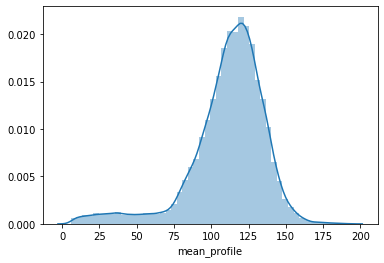

In [84]:
# distribui√ß√£o assim√©trica
sns.distplot(stars.mean_profile)

Qual a diferen√ßa entre os quantis Q1, Q2 e Q3 de false_pulsar_mean_profile_standardized e os mesmos quantis te√≥ricos de uma distribui√ß√£o normal de m√©dia 0 e vari√¢ncia 1? Responda como uma tupla de tr√™s elementos arredondados para tr√™s casas decimais.

In [ ]:
quant1, quant2, quant3 = [false_pulsar_mean_profile_standardized.quantile(i) for i in [0.25,0.5, 0.75]]
q1_teorico, q2_teorico, q3_teorico = [sct.norm.ppf(i, loc=0, scale=1) for i in [0.25,0.5, 0.75]]
(round(quant1-q1_teorico,3), round(quant2-q2_teorico,3), round(quant3-q3_teorico,3))

## Quest√£o 4

Considerando a vari√°vel `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela n√£o √© um pulsar).
2. Padronize a vari√°vel `mean_profile` filtrada anteriormente para ter m√©dia 0 e vari√¢ncia 1.

Chamaremos a vari√°vel resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis te√≥ricos para uma distribui√ß√£o normal de m√©dia 0 e vari√¢ncia 1 para 0.80, 0.90 e 0.95 atrav√©s da fun√ß√£o `norm.ppf()` dispon√≠vel em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF emp√≠rica da vari√°vel `false_pulsar_mean_profile_standardized`? Responda como uma tupla de tr√™s elementos arredondados para tr√™s casas decimais.

In [ ]:
def q4():
    mp = stars[stars['target']==False]['mean_profile']
    false_pulsar_mean_profile_standardized = (mp-mp.mean())/mp.std()
    ppf = sct.norm.ppf([0.8,0.9, 0.95], loc=0, scale=1) 
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    return (round(ecdf(ppf[0]),3),round(ecdf(ppf[1]),3), round(ecdf(ppf[2]),3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribui√ß√£o da vari√°vel `false_pulsar_mean_profile_standardized`?

O procedimento realizado pode ser explicado assim: utilizou-se a fun√ß√£o norm.ppf() para descobrir os quantis te√≥ricos para uma distribui√ß√£o normal de m√©dia 0 e vari√¢ncia 1. Como nossa distribui√ß√£o n√£o √© normal, temos que usar a CDF emp√≠rica para descobrir as reais probabilidades desses quantis em rela√ß√£o √† nossa disitrbui√ß√£o. Esse procedimento consegue ser garantido gra√ßas √† padroniza√ß√£o anteriormente feita, que faz com que a m√©dia e a vari√¢ncia sejam respectivamente 0 e 1, garantindo a compatibilidade na hora de averiguar as reais probabilidades dos quantis te√≥ricos. 

Os valores encontrados fazem sentido quando comparados com a distribui√ß√£o dos valores da vari√°vel `false_pulsar_mean_profile_standardized`, visualizados com o aux√≠lio do m√©todo describe(): por exemplo, 75% dos dados est√£o abaixo de 0.67065487, o que permite intuit que , conforme a ECDF, para o quantil 0.84162123, a probabilidade de 0.806 faz sentido.

## Quest√£o 5

Qual a diferen√ßa entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis te√≥ricos de uma distribui√ß√£o normal de m√©dia 0 e vari√¢ncia 1? Responda como uma tupla de tr√™s elementos arredondados para tr√™s casas decimais.

In [ ]:
def q5():
    q1, q2, q3 = [false_pulsar_mean_profile_standardized.quantile(i) for i in [0.25,0.5, 0.75]]
    q1_teorico, q2_teorico, q3_teorico = [sct.norm.ppf(i, loc=0, scale=1) for i in [0.25,0.5, 0.75]]
    return (round(q1-q1_teorico,3), round(q2-q2_teorico,3), round(q3-q3_teorico,3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribui√ß√£o da vari√°vel `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hip√≥teses sobre normalidade dos dados utilizam essa mesma abordagem.